# Data Understanding
For each subsection will b specified:
 - the related issue: e.g. (`#3`)
 - the assignee (`djanloo`, `tommy`)

| Task | Issue | Assignee |
| ----:| -----:| --------:|
| **semantics**   | `#4`| `djanloo` |
| **distribution** | `#4`| `djanloo` |
| **quality**    | `#5`| `tommy`  |
| **transformations**    | `#5`| `tommy`  |
| **correlations**    | `#4`| `djanloo`  |

In [218]:
# Imports and preliminary stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

# Sets default font
mpl.rcParams['font.size'] = 9.0

import seaborn as sns
sns.set()

In [219]:
df = pd.read_csv("ravdess_features.csv")
# Set to display all fields
pd.set_option('display.max_rows', 15, 'display.max_columns', None)
display(df)
len(df)
len(df.columns)

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.000000,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.000000,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.000000,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.000000,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.000000,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.000000,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.000000,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.000000,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.000000,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.000000,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,audio-only,speech,calm,strong,Kids are talking by the door,1st,23.0,M,1,2,48000,2,4605,221021.0,NaN,9871,-30.225578,158.845500,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,0.573838,0.304496,0.000000,1.0,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2448,audio-only,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M,1,2,48000,2,4171,200200.0,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,0.591010,0.306333,0.000000,1.0,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2449,audio-only,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M,1,2,48000,2,5239,251451.0,NaN,9765,-26.135280,138.133210,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,0.467994,0.347843,0.000000,1.0,-1.473789,0.130310,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821
2450,audio-only,speech,surprised,normal,Kids are talking by the door,1st,NaN,M,1,2,48000,2,3737,179379.0,-45.751265,9716,-28.242815,159.943400,-868.09576,219.84350,5524.736973,3596.031841,760.822547,11981.912464,-1.465594,0.206481,0.578854,0.308684,0.001565,1.0,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966


38

### Semantics

See report for variables meaning.

#### Data types

|feature | type |
|--------|------|
|modality|?|
|vocal_channel | binary |
|emotion | categorical |
|emo_intens | binary|
|statement|binary|
|repetition|binary|
|actor|categorical (marginally ordinal)|
|sex|binary|
|**others**| quantitative |


Since `modality` is categorical with only one value we drop it now. Same for `frame_rate`.

In [220]:
# Categorical/quantitative split
df = df.rename(columns={"zero_crossings_sum": "zcs"})
df.drop(columns=["modality", "frame_rate", "sample_width"], inplace=True)
categorical_features = ["vocal_channel", "emotion","emotional_intensity", 
                        "statement", "repetition", "actor", "sex", 
                        "frame_width", "channels"]
quantitative_features = [feat for feat in df.columns if not feat in categorical_features]

In [221]:
stats = df.describe()
display(stats)

print(f"Dataset has {len(df.columns)} features")

# Print fields with missing values
print("Missing values:")
for field in stats.columns:
    missing_ratio = 1 - stats[field]["count"] / len(df) 
    if missing_ratio > 0.0:
        print(f"Field {field:>10}: {missing_ratio*100:.1f}%  of missing ")
print()
# Check for field that have only one value
print("Features that have only one value:")
for field in stats.columns:
    if stats[field]["min"] == stats[field]["max"]:
        print(f"- {field}")


,actor,channels,frame_width,length_ms,frame_count,intensity,zcs,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.000000,2452.000000,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.0,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,12.582202,1.002447,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,136.777233,-758.909381,199.182514,5170.101398,3365.453393,551.834124,11830.461864,-1.142642,0.348442,0.475846,0.331371,0.002272,1.0,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,6.916240,0.049416,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,20.451689,99.945452,26.002107,875.185444,580.479034,508.025890,1004.955976,0.572654,0.353005,0.082551,0.023773,0.004830,0.0,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,1.000000,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,83.621370,-1085.479700,126.250810,2360.880942,1491.341071,0.000000,7657.495158,-1.795576,-0.510390,0.214089,0.210126,0.000000,1.0,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,7.000000,1.000000,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,122.623928,-826.464075,180.081417,4563.684781,3025.431971,0.000000,11516.034429,-1.496187,0.098549,0.415260,0.317780,0.000000,1.0,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,13.000000,1.000000,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,136.523810,-760.983065,201.697175,5122.712259,3433.835368,707.319256,12000.292653,-1.308938,0.347621,0.475740,0.334224,0.000190,1.0,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,19.000000,1.000000,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,151.385135,-692.890015,218.185288,5775.959809,3768.503344,977.693852,12091.886054,-0.982944,0.557427,0.530571,0.349272,0.001999,1.0,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,24.000000,2.000000,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,195.942920,-461.489320,280.173700,7655.335726,4819.783069,2121.417965,17477.540047,3.657953,1.825436,0.724077,0.391928,0.039378,1.0,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


Dataset has 35 features
Missing values:
Field      actor: 45.9%  of missing 
Field  intensity: 33.3%  of missing 

Features that have only one value:
- stft_max


From this we can conclude that:
- `sample_width`
- `frame_rate`
- `stft_max`

are **useless** features, since they are equal for everyone.

Furthermore, `actor` field has almost 50% of missing values, so it is higly probable that it will be useless too.

In [222]:
df.vocal_channel.isna().sum()/len(df)

0.0799347471451876

In [223]:
# Remove useless features
print(quantitative_features)
useless_features = ["channels", "sample_width", "frame_rate", "frame_count"]
try:
    df.drop(columns=useless_features, inplace=True)
except KeyError:
    pass
quantitative_features = list(set(quantitative_features) - set(useless_features))
quantitative_features.sort()
print(quantitative_features)

['length_ms', 'frame_count', 'intensity', 'zcs', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_mean', 'stft_std', 'stft_min', 'stft_max', 'stft_kur', 'stft_skew', 'mean', 'std', 'min', 'max', 'kur', 'skew']
['intensity', 'kur', 'length_ms', 'max', 'mean', 'mfcc_max', 'mfcc_mean', 'mfcc_min', 'mfcc_std', 'min', 'sc_kur', 'sc_max', 'sc_mean', 'sc_min', 'sc_skew', 'sc_std', 'skew', 'std', 'stft_kur', 'stft_max', 'stft_mean', 'stft_min', 'stft_skew', 'stft_std', 'zcs']


### Distribution

##### Trivial quantitative features

In [224]:
trivial_quant_features = ["min", "max", "std",  "kur", "skew", "intensity", "zcs", "mean","length_ms"]

In [225]:
df[["min", "max"]].corr(method="pearson").values

array([[ 1.        , -0.97988944],
       [-0.97988944,  1.        ]])

#### Per-family distributions

In [226]:
from sklearn.preprocessing import MinMaxScaler
df_rescaled = df.copy()

stats1 = ["mean", "std", "max", "min"]
stats2 = ["mean", "std", "kur", "skew", "max", "min"]
mfcc_family = [f"mfcc_{u}" for u in stats1]
stft_family = [f"stft_{u}" for u in stats2]
sc_family = [f"sc_{u}" for u in stats2]

for family in [mfcc_family, sc_family, stft_family, trivial_quant_features]:
    for feature in family:
        df_rescaled[feature] = MinMaxScaler().fit_transform(df[feature].to_numpy().reshape(-1,1))

# df = df_rescaled

In [227]:
def get_normalized_df(feature_family):
    norm_df = pd.DataFrame(columns = ["feature", "normalized_value", "true_value"])
    for feat in feature_family:
        single_feature_df = pd.DataFrame(dict(feature=[feat]*len(df), normalized_value=df_rescaled[feat], true_value=df[feat]) )
        norm_df = pd.concat([norm_df, single_feature_df], ignore_index=True)
    return norm_df

In [228]:
from matplotlib import rcParams
rcParams["figure.autolayout"] = False

trivial
sc
mfcc
stft


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/tmp/ipykernel_4319/597635977.py:41: RuntimeWarning: invalid value encountered in scalar divide
  x1, x2 = (q1 - m)/(M - m), (q2 - m)/(M - m)
[d3blocks] >WARNING> posx and posy should be finite values
[d3blocks] >WARNING> posx and posy should be finite values
[d3blocks] >WARNING> posx and posy should be finite values
[d3blocks] >WARNING> posx and posy should be finite values


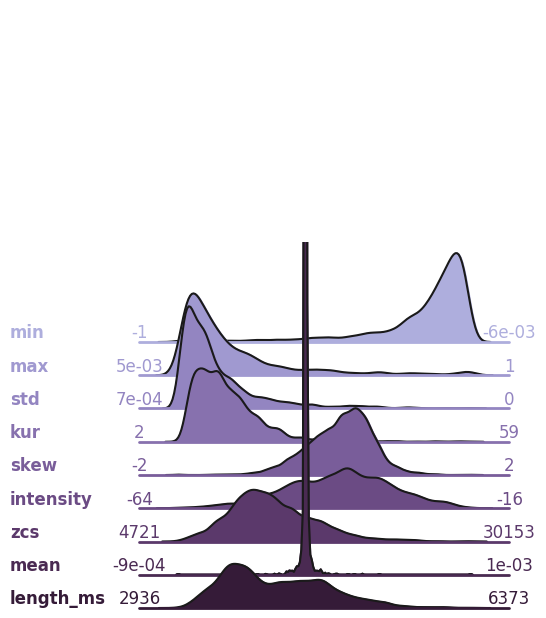

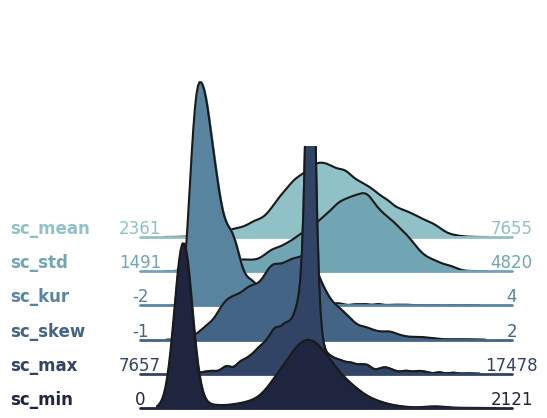

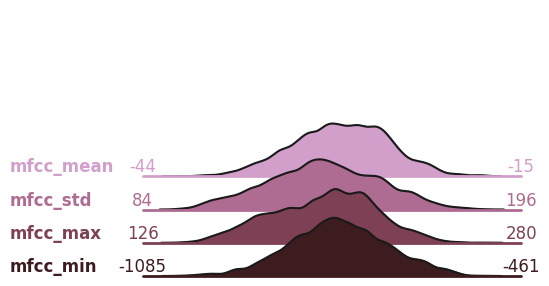

[d3blocks] >WARNING> posx and posy should be finite values
[d3blocks] >WARNING> posx and posy should be finite values
[d3blocks] >WARNING> posx and posy should be finite values
[d3blocks] >WARNING> posx and posy should be finite values


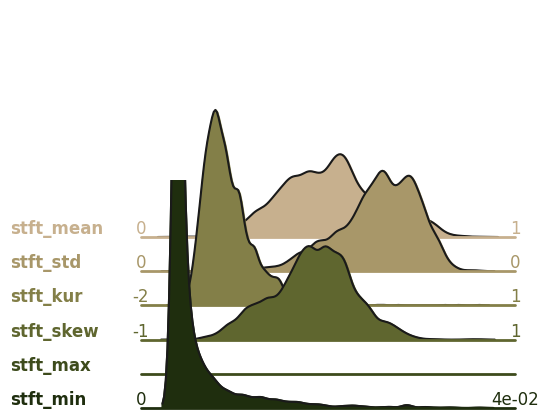

In [229]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object

sc_params = dict(hspace = -0.85, startcolor=0, name="sc", family=sc_family, top=1, bottom=0.05, ylim=(0,7.5))
mfcc_params =  dict(hspace = -0.8, startcolor=1, name="mfcc", family=mfcc_family, top=1, bottom=0.05, ylim=(0,7.5))
stft_params = dict(hspace = -0.85, startcolor=1.8, name="stft", family=stft_family, top=1, bottom=0.05, ylim=(0,7.5))
triv_params = dict(hspace = -0.9, startcolor=0.5, name="trivial", family=trivial_quant_features, top=1, bottom=0.05, ylim=(0,20.5))

for par in [triv_params, sc_params, mfcc_params, stft_params]:
      print(par["name"])
      normalized_df = get_normalized_df(par["family"])
      Nplots= len(par["family"])

      pal = sns.cubehelix_palette(Nplots,start=par["startcolor"], rot=-.25, light=.7)
      g = sns.FacetGrid(normalized_df, row="feature", hue="feature", aspect=8, height=0.7, palette=pal)

      g.despine(bottom=True, left=True)

      # Draw the densities in a few steps
      g.map(sns.kdeplot,  "normalized_value",
            clip_on=True,
            fill=True, alpha=1, linewidth=1.5, bw_adjust=0.61)
      g.map(sns.kdeplot, "normalized_value", clip_on=True, color="k", lw=1.5, bw_adjust=0.61)

      # passing color=None to refline() uses the hue mapping
      g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

      # Define and use a simple function to label the plot in axes coordinates
      def label(x, color, label):
            ax = plt.gca()
            ax.text(-0.35, .0, label, fontweight="bold", color=color,
                        ha="left", va="bottom", transform=ax.transAxes)

      def write_extremes(trues, color, label):
            ax=plt.gca()
            filtered = trues[np.logical_not(np.isnan(trues))]

            m, M = min(filtered), max(filtered)
            q1, q2 = np.quantile(filtered, [.0, 1])
            
            x1, x2 = (q1 - m)/(M - m), (q2 - m)/(M - m)

            if abs(q2) > 0.1:
                  strmax = f"{q2:.0f}"
            else:
                  strmax = f"{q2:.0e}"
            
            if abs(q1) > 0.1 or abs(q1) == 0.0:
                  strmin = f"{q1:.0f}"
            else:
                  strmin = f"{q1:.0e}"


            ax.text(x1, .00, strmin,  color=color,
                        ha="center", va="bottom", transform=ax.transAxes, zorder=3)
            ax.text(x2, .00,strmax ,  color=color,
                        ha="center", va="bottom", transform=ax.transAxes, zorder=3)
                        
      g.map(label,  "normalized_value")
      g.map(write_extremes, "true_value")
      # Set the subplots to overlap
      g.figure.subplots_adjust(hspace=par["hspace"], top=par["top"], bottom=par["bottom"])

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      g.set(ylim=par["ylim"])
      g.set(yticks=[], ylabel="")
      g.set(xticks=[], xlabel="")
      plt.savefig(f"images/{par['name']}_family_distrib.pdf")


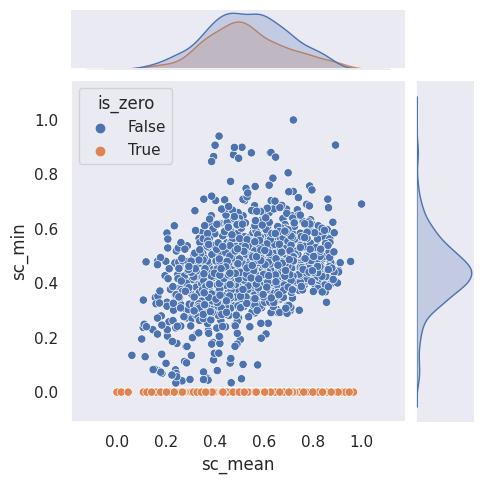

In [230]:
from sklearn.preprocessing import MinMaxScaler
sns.set_style("dark")
s = MinMaxScaler()
x,y = s.fit_transform(df[["sc_mean", "sc_min"]]).T
is_zero = (y==0)
tmp_df = pd.DataFrame(dict(sc_mean=x, sc_min=y, is_zero=is_zero))

sns.jointplot(data=tmp_df, x="sc_mean", y="sc_min", hue="is_zero", height=5)
plt.savefig("images/patological_sc.pdf")


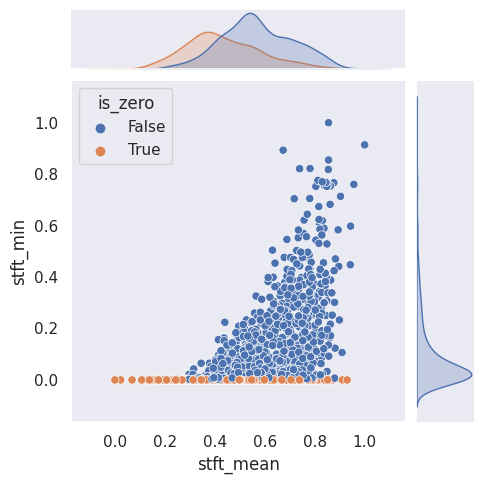

In [231]:
s = MinMaxScaler()
x,y = s.fit_transform(df[["stft_mean", "stft_min"]]).T
is_zero = (y==0)
tmp_df = pd.DataFrame(dict(stft_mean=x, stft_min=y, is_zero=is_zero))


sns.jointplot(data=tmp_df, x="stft_mean", y="stft_min", hue="is_zero", height=5)
plt.savefig("images/patological_stft.pdf")

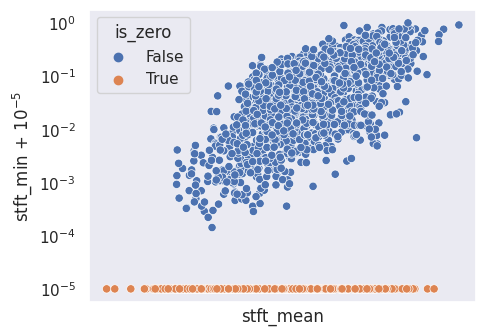

In [232]:
fig, ax=plt.subplots(figsize=(5,3.8))

s = MinMaxScaler()
x,y = s.fit_transform(df[["stft_mean", "stft_min"]]).T
is_zero = (y==0)
tmp_df = pd.DataFrame(dict(stft_mean=x, stft_min=y+1e-5, is_zero=is_zero))


sns.scatterplot(data=tmp_df, x="stft_mean", y="stft_min", hue="is_zero", ax=ax)
plt.yscale("log")
plt.xticks([])
plt.ylabel("stft_min + $10^{-5}$")
plt.savefig("images/patological_stft_log.pdf")


At first glance some features are distributed in a "uneven" way, such as:

- kur
- max
- min
- sc_kur
- stft_kur
- std
- **mean** 
- **sc_min**
- **stft_min**


the last three appear to be somewhat patological since:
- log(std) is proportional to intensity (redundancy)
- mean is not distributed
- sc_min, stft_min are "bimodal"


Since these features span many orders of magnitude, a `log_scale` is suggested for transformation

For the "patological" ones:

This means that:
- mean feature is better-behaved if log-scaled, after being transported to non-negative values
- sc_min and stft_min has to be deeper investigated

##### Categorical features

In [233]:
df_clean_labels = df.copy()
df_clean_labels.actor = pd.Categorical(df_clean_labels.actor).codes
df_clean_labels.vocal_channel.fillna("N/A", inplace=True)
df_clean_labels.replace({'statement': {"Dogs are sitting by the door": "statement 1", 
                                        "Kids are talking by the door": "statement 2"}}, inplace=True)
df_clean_labels.replace({'actor': {-1: "N/A"}}, inplace=True)

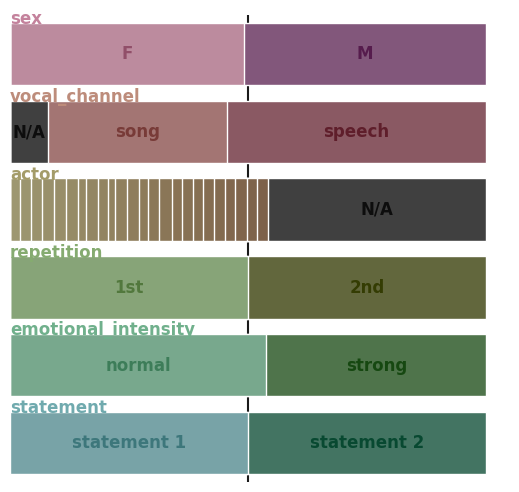

In [234]:
sns.set_style("white")

fig,ax = plt.subplots(figsize=(5,5.4))
start_points = np.linspace(0,2.1,7)

used_categories = set(categorical_features) - set(["emotion", "frame_width", "channels"])
used_categories = list(used_categories)

for i, cat in enumerate(used_categories):
    okay = np.zeros(len(df_clean_labels))
    row = df_clean_labels[cat].apply(str)
    prev_y = 0
    palette = sns.cubehelix_palette(len(np.unique(row)), start=start_points[i], light=.6, dark=.4)

    for j, value in enumerate(np.unique(row)):
        y = np.zeros(len(used_categories))
        okay = (okay)|(row == value)
        y[i] = np.sum(okay)/len(df)

        if value == "N/A":
            color = (0.25,0.25,0.25)
        else:
            color = palette[j]
        # print(f"{cat} - {value} -> {np.sum(okay)}")
        sns.barplot(x=y, y=used_categories, ax = ax, orient="h", alpha=1, color=color, zorder=-j)
        color = np.abs(np.array(color) - np.array([0.2,0.2,0.2]))
        if cat == "frame_width" or cat=="channels":
            ax.annotate(value, xy=((y[i] + prev_y)/2+0.02, i), color=color, ha="center", va="center", fontweight="bold")
        elif cat != "actor" or value=="N/A":
            ax.annotate(value, xy=((y[i] + prev_y)/2, i), color=color, ha="center", va="center", fontweight="bold")
        prev_y = y[i]
    
    ax.text(0, 1-i/6 -0.008 , cat ,  color=palette[0],
                        ha="left", va="center", transform=ax.transAxes, zorder=3, fontweight="bold")

ax.axis("off")

ax.set_yticks([])
ax.set_xticks([])
plt.subplots_adjust(left=0, right=1, top=0.99, bottom=0.125)
ax.axvline(0.5, ls="-", zorder=-30, color='k')
print()
fig.savefig("images/categorical_bars.pdf")

vocal_channel  NA  song  speech
emotion                        
angry          25   169     182
calm           25   169     182
disgust        13     0     179
fearful        41   166     169
happy          33   163     180
neutral        16    85      87
sad            32   169     175
surprised      11     0     181


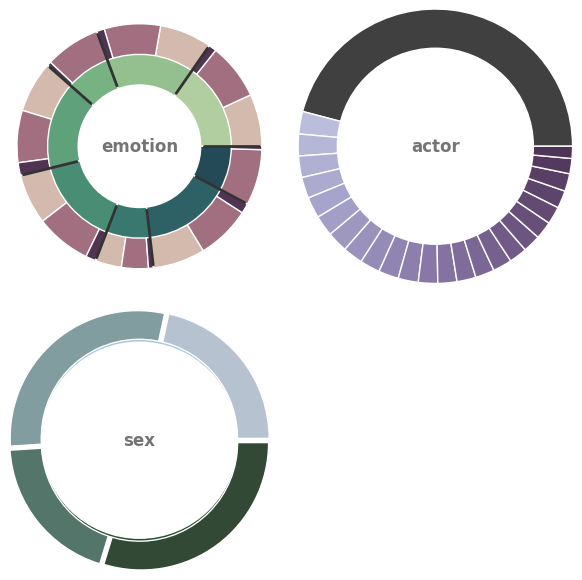

In [235]:
fig, axes = plt.subplots(2,2, figsize=(7,7))
axes= axes.flatten()

axemo, axact, axsex, _ = axes


# Emotion
# colors = sns.cubehelix_palette(8, start = 0, rot=-.25, light=.75, dark=.25)
# groups = df.emotion.value_counts().values
# # Create a pieplot
# axemo.pie(groups, radius=1.4, colors=colors)

# EMOTION
R, r, rcirc = 2, 1.5, 1
cont = pd.crosstab(index=df['emotion'], columns=df['vocal_channel'].fillna("NA"))
print(cont)
groups = []
subgroups = []

for emo in np.unique(df.emotion):
    tot = np.sum(cont.loc[emo].values)/len(df)
    groups.append(tot)
    for v in ["song", "speech", "NA"]:
        subgroups.append(cont.loc[emo,v]/len(df))

colors = sns.cubehelix_palette(3, start = 0 , rot=.5, light=.75, dark=.25, hue=0.6)
axemo.pie(subgroups, radius=R, colors=colors, explode=[0.]*len(subgroups))


colors = sns.cubehelix_palette(len(groups), start = 0 , rot=-.55, light=.75, dark=.25)
# Create a pieplot
axemo.pie(groups, radius=r, colors=colors, explode=[0.]*len(groups))


angle=0.0
delta=0.051
for p in groups:
    xstart, ystart = np.cos(angle)*(rcirc+delta), np.sin(angle)*(rcirc+delta)
    xend, yend = np.cos(angle)*(R-delta), np.sin(angle)*(R-delta)
    axemo.plot([xstart, xend], [ystart,yend], color=(0.2,0.2,0.2), lw=2, zorder=3)
    angle += 2*np.pi*p/np.sum(groups)

axemo.set_xlim(-R, R)
axemo.set_ylim(-R, R)


# Actors
colors = [(0.25,0.25,0.25,1)] + sns.cubehelix_palette(24, start = 0.5, rot=-.25, light=.75, dark=.25, hue=0.6)

groups = df.actor.fillna("NA").value_counts().values
# Create a pieplot
axact.pie(groups, radius=1.4, colors=colors)

# Sex
cont = pd.crosstab(index=df['sex'], columns=df['vocal_channel'].fillna("NA"))

groups = []
subgroups = []

for sex in ["M","F"]:
    tot = np.sum(cont.loc[sex].values)/len(df)
    groups.append(tot)
    for v in ["song", "speech"]:
        subgroups.append(cont.loc[sex,v]/len(df))


colors = sns.cubehelix_palette(4, start = 1.6 , rot=.5, light=.75, dark=.25, hue=0.4)
axsex.pie(subgroups, radius=1.3, colors=colors, explode = [0.03]*4)

colors = sns.cubehelix_palette(2, start = 1.6 , rot=.5, light=.75, dark=.25)
groups = df.sex.value_counts().values
# Create a pieplot
axsex.pie(groups, radius=1.0, colors=colors,explode = [0.03]*2)

axsex.text(0,0,"sex", fontweight="bold", ha="center", va="center", color="#747474")
axact.text(0,0,"actor", fontweight="bold", ha="center",va="center", color="#747474")
axemo.text(0,0,"emotion", fontweight="bold", ha="center", va="center", color="#747474")



for ax in axes:
    ax.axis("off")
    ax.set_aspect("equal")
    my_circle=plt.Circle( (0,0), rcirc, color='white')

    ax.add_artist(my_circle)



In [236]:
actor_sex = dict()
for actor in range(1,25):
    actor_sex[actor] = None

for i, row in df.iterrows():
    if not np.isnan(row.actor):
        actor, sex = row.actor , row.sex
        if actor_sex[actor] is None:
            actor_sex[actor] = sex
        else:
            if actor_sex[actor] != sex:
                print(f"sex mismatch for actor {actor} in row {row.index}")
actor_sex_df = pd.DataFrame(columns=["actor", "sex", "color"])
for key, value in actor_sex.items():
    actor_sex_df = pd.concat([actor_sex_df, pd.DataFrame(dict(actor=int(key), sex=value,color="n"),  index=[0])], ignore_index=True)
actor_sex_df = actor_sex_df.sort_values(by=["sex", "actor"])
actor_sex_df.color = list(sns.cubehelix_palette(12, hue=0.6, light=0.75, dark=0.45)) + list(sns.cubehelix_palette(12,rot=-.3,  hue=0.6, light=0.75, dark=0.45))
color_dict = dict(actor_sex_df[["actor", "color"]].values)
print(color_dict)


{2: [0.8499526567729362, 0.7101009441469535, 0.7181445780790544], 4: [0.8308436642309959, 0.6774124325380012, 0.6960350464165815], 6: [0.8105924595814891, 0.645054739019547, 0.675266247451404], 8: [0.7890835096337036, 0.6131234440570053, 0.6556406105787421], 10: [0.7662260000121806, 0.5817040683835617, 0.6369471071501726], 12: [0.74195463467241, 0.5508711094473928, 0.618964238148083], 14: [0.7162301499932415, 0.5206872066273684, 0.6014631096176819], 16: [0.6890395400477004, 0.4912024425008501, 0.5842105660578473], 18: [0.6603959921608136, 0.4624537862473693, 0.5669723515704834], 20: [0.6303385343716279, 0.4344646840260189, 0.549516268409364], 22: [0.5989313989078644, 0.4072447998817855, 0.5316153026545191], 24: [0.5662631082368008, 0.3807899094265407, 0.5130506870661462], 1: [0.653339679770462, 0.8004870784242085, 0.7695618247195232], 3: [0.6193770240095083, 0.7750091432580711, 0.7492872403698865], 5: [0.5865827113965996, 0.7488441399970334, 0.7295114632465909], 7: [0.5549858375899335,

In [237]:
np.quantile(df.sc_max, 0.5)

12000.292652614804

surprised-song not in counts
disgust-song not in counts
0         1
1         1
2         1
3         1
4         1
       ... 
2447    NaN
2448    NaN
2449    NaN
2450    NaN
2451    NaN
Name: actor, Length: 2452, dtype: object
18-song not in counts


/tmp/ipykernel_4319/571687065.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_actor_df.actor.loc[np.logical_not(correct_actor_df.actor.isna())] = correct_actor_df.actor.loc[np.logical_not(correct_actor_df.actor.isna())].apply(lambda x: str(int(x)))


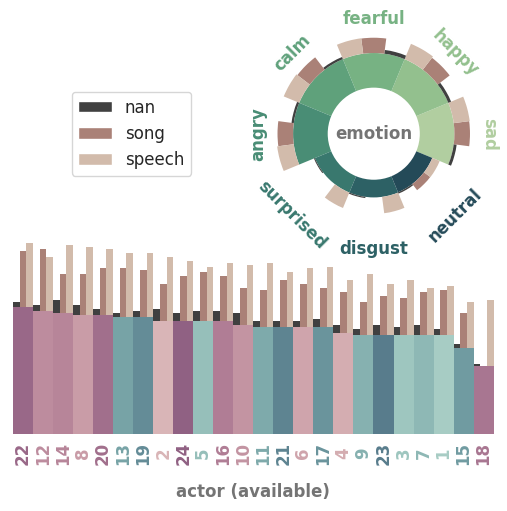

In [238]:
def round_hist(data_frame, feat, subfeat, 
        ax=None, fillnas=[True, True], 
        bottom=300, label_height=700, rotate_labels=True, title_pos=(0,0), title_rot=0, 
        labels_color=None, title=None, group_bar_colordict=None):
    data = data_frame.copy()
    for fillna, fill_feat in zip(fillnas, [feat, subfeat]):
        if not fillna:
            data = data.loc[np.logical_not(data[feat].isna())]
        else:
            data[feat] = data[feat].fillna("alberto")

    data[feat] = data[feat].apply(str)
    data[subfeat] = data[subfeat].apply(str)

    group_labels = np.unique(data[feat])
    group_width = 2*np.pi/len(group_labels)
    # subgroups_angles = np.linspace(0, 2*np.pi/len(np.unique(data[feat])), len())
    feat_counts = data[feat].value_counts()[group_labels]

    order = np.argsort(feat_counts)

    group_labels = group_labels[order[::-1]]
    feat_counts = feat_counts[order[::-1]]

    if group_bar_colordict is None:
        colors = sns.cubehelix_palette(len(group_labels), start = 0 , rot=-.55, light=.75, dark=.25)
    else:
        colors = [group_bar_colordict[int(g)] for g in group_labels]

    subgroup_labels = np.unique(data[subfeat])
    M = len(subgroup_labels)

    group_angles = []
    subfeat_counts = []
    subfeat_angles = []
    subfeat_bottoms = []
    counts = data[[feat, subfeat]].value_counts()
    for i, feat_val in enumerate(group_labels):
        group_angles.append(i*group_width)
        for j, subfeat_val in enumerate(subgroup_labels):
            try:
                cross_counts = counts[feat_val, subfeat_val]
            except KeyError:
                print(f"{feat_val}-{subfeat_val} not in counts")
                cross_counts = 0
            subfeat_counts.append(cross_counts)
            delta = group_width/(2*M)*(2*j - M + 1)
            subfeat_angles.append( i*group_width + delta)
            subfeat_bottoms.append( bottom + feat_counts[i])
            

    # Draw bars
    bars = ax.bar(
        x=group_angles, 
        height=feat_counts, 
        width=group_width, 
        bottom=bottom,
        linewidth=0., 
        edgecolor="white",
        color=colors,
        alpha=1
    )

    # # Add labels
    if labels_color is None:
        labels_color = colors
    else:
        labels_color = [labels_color] * len(group_labels)
        print(f"label colors are {labels_color}")

    for bar, angle, height, label, label_c in zip(bars, group_angles, feat_counts, group_labels, labels_color):
        
        if rotate_labels==True:
            # Labels are rotated. Rotation must be specified in degrees :(
            rotation = np.rad2deg(angle) - 90

            # Flip some labels upside down
            alignment = ""
            if angle > np.pi:
                rotation += 180
        else:
            rotation = float(rotate_labels)

        # Finally add the labels
        ax.text(
            x=angle, 
            y=bottom+label_height, 
            s=label, 
            ha="center", 
            va='center', 
            rotation=rotation, 
            color=label_c,
             fontweight="bold",
            rotation_mode="anchor") 

    colors = [(0.25,0.25,0.25,1)] +  sns.cubehelix_palette(len(subgroup_labels)-1, start = 0.7, rot=.2, light=.75, dark=.55, hue=0.6, reverse = True) 
    bars = ax.bar(
        x=subfeat_angles, 
        height=np.array(subfeat_counts), 
        width=group_width/len(subgroup_labels), 
        bottom=subfeat_bottoms,
        linewidth=0., 
        edgecolor="white",
        color=colors,
        alpha=1
    )
    if title is None:
        title=feat 
    ax.text(*title_pos,title, fontweight="bold", ha="center", va="center", color="#747474", rotation=title_rot)
    return colors, subgroup_labels

# initialize the figure
plt.figure(figsize=(5,5))
ax = plt.subplot(222, polar=True)
ax.axis('off')

legend_colors, legend_labels = round_hist(df ,"emotion", "vocal_channel", ax=ax, bottom=500, label_height=750, rotate_labels=True)

ax = plt.subplot(212, polar=False)
ax.axis('off')

correct_actor_df = df.copy().sort_values(by="actor").reset_index()
correct_actor_df.actor.loc[np.logical_not(correct_actor_df.actor.isna())] = correct_actor_df.actor.loc[np.logical_not(correct_actor_df.actor.isna())].apply(lambda x: str(int(x)))
print(correct_actor_df.actor)

# Setting male/female colors

round_hist(correct_actor_df,"actor", "vocal_channel", ax=ax, fillnas=[False, True], bottom=30, label_height=-10, rotate_labels=90, title_pos=(3, 0), title_rot=0, title="actor (available)", group_bar_colordict=color_dict)
ax.set_xlim(-0.17,6.17)

ax_legend = plt.subplot(221)
ax_legend.axis("off")
from matplotlib.patches import Patch

legend_elements = []

for c,l in zip(legend_colors, legend_labels):
    legend_elements.append(Patch(facecolor=c, label=l))

ax_legend.legend(handles=legend_elements, loc='center', fontsize=12,  ncols=1)
plt.subplots_adjust(bottom=.15, top=0.95, hspace=0, wspace=0, right=0.97, left=0)
plt.savefig("images/categ_distrib_circ.pdf")

In [239]:
counts = df[["sex", "vocal_channel"]].value_counts()
counts["F", "song"]

434

### Quality

#### intensity

First of all, missing valus of `intensity` feature are replaced using the decibel conversion on `std`

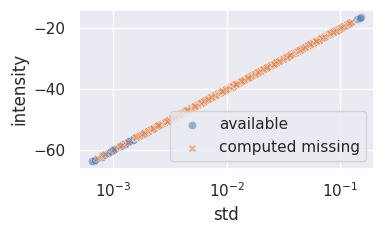

In [240]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(4,2.5))
x = df["std"][df.intensity.isna()]
y = 20*np.log10(x)
sns.scatterplot(data=df, x="std", y="intensity", ax=ax, label="available", alpha=0.5)
sns.scatterplot(x=x,y=y,marker="X", label="computed missing", ax=ax, alpha=0.5)
ax.set_xscale("log")
plt.tight_layout()
fig.savefig("images/intensity_fill.pdf")

In [138]:
df.intensity[df.intensity.isna()] = 20*np.log10(df["std"][df.intensity.isna()])

/tmp/ipykernel_4319/3702779853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.intensity[df.intensity.isna()] = 20*np.log10(df["std"][df.intensity.isna()])


#### Fourier tranform min zeros

It is possible to see that two features (`sc_min`, `stft_min`) are not well behaved

Indeed, both those values are often both equal to zero. The ratio of such samples over the total is:

In [139]:
print(((df.sc_min==0)&(df.stft_min==0)).sum()/len(df)*100)

41.6394779771615


So almost half of the dataset seem to suffer from a numerical problem: since both variables are the result of the `min` operation over the power spectrum, it is possible that some spurious zeros (maybe due to acoustic noise or sampling problem) set these features to zero.

For the sake of correlations, let's see if those patological samples are ralated to some categorical features

It doesn't seem that patological samples of `sc_min` belong to a certain category.

So `stft_min` patological samples do not match any category. This means that classification can't take any information from those and a correction operation is allowed.

Let's do the pie chart of the patological features to check whether they are biased in some category

It can be seen that every category reflects the whole-dtaset distribution, while the `sex` feature is uneven in the patological data. So it seems that correcting these values will make us loose information about sex.

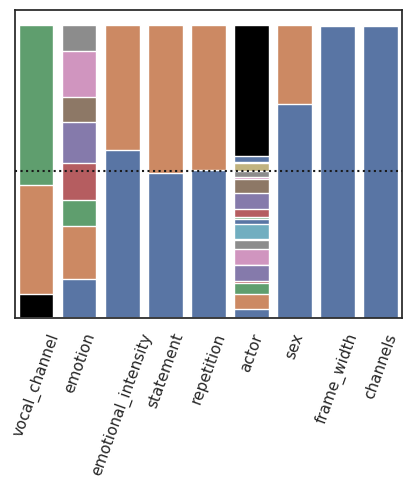

In [26]:
fig,ax = plt.subplots(figsize=(5,4))
wrong_samples = np.where((df.sc_min==0)&(df.stft_min==0))
df_clean_labels = df.copy()
df_clean_labels.vocal_channel.fillna("N/A", inplace=True)
df_clean_labels.replace({'statement': {"Dogs are sitting by the door": "statement 1", 
                                        "Kids are talking by the door": "statement 2"}}, inplace=True)
                                        
df_clean_labels.actor = pd.Categorical(df_clean_labels.actor).codes
df_clean_labels.replace({'actor': {-1: "N/A"}}, inplace=True)

ciuccia = df_clean_labels.iloc[wrong_samples]

for i, cat in enumerate(categorical_features):
    okay = np.zeros(len(ciuccia))
    row = ciuccia[cat].apply(str)
    for j, value in enumerate(np.unique(row)):
        y = np.zeros(len(categorical_features))
        okay = (okay)|(row == value)
        y[i] = np.sum(okay)/len(ciuccia)

        if value == "N/A":
            color = "black"
        else:
            color = sns.color_palette()[j%10]
        # print(f"{cat} - {value} -> {np.sum(okay)}")
        sns.barplot(x=categorical_features, y =y, ax = ax, alpha=1, color=color, zorder=-j)
        # ax.annotate(value, xy=(i-0.2, y[i]-0.2), rotation=45)
ax.set_xticks(range(len(categorical_features)), labels=categorical_features, rotation=70)
ax.set_yticks([])
ax.axhline(0.5, ls=":", zorder=100, color='k')
print()
fig.savefig("images/categorical_bars_wrong.pdf")

#### Chi-squared test 

In [140]:
from scipy.stats import chisquare, chi2_contingency

df_whole = df.copy()
df_whole.actor = pd.Categorical(df_whole.actor).codes
df_whole.replace({'actor': {-1: "N/A"}}, inplace=True)
df_whole.actor = df_whole.actor.apply(str)
df_whole.fillna("NA", inplace=True)

filter = (df_whole.sc_min == 0.0)&(df_whole.stft_min == 0.0) 
wrong_samples = np.where(filter)
right_samples = np.where(np.logical_not(filter))


df_rig = df_whole.iloc[right_samples]
df_pat = df_whole.iloc[wrong_samples]

ps = []

for cat in categorical_features:
    rig_occ = df_rig.groupby(cat).size().values
    pat_occ = df_pat.groupby(cat).size().values
    if cat == "actor":
        print(set(np.unique(df_rig[cat] )) - set(np.unique(df_pat[cat])))
    if cat != "actor" and cat != "frame_width" and cat != "channels":
        chisq, p, dof, ex = chi2_contingency([pat_occ, rig_occ])
        # chisq,p = chisquare(pat_occ, f_exp=rig_occ)
        print(f"{cat}: \tchisq = {chisq}\tp = {p}\tdof = {dof}")
        print(f"\tpat {pat_occ} \texp_pat {ex[0]}")
        print(f"\trig {rig_occ} \texp_rig {ex[1]}")
        ps.append(p)
        print()
  
for p in ps:
    print(p, end = " &")

vocal_channel: 	chisq = 0.16069969321563918	p = 0.9227934537489699	dof = 2
	pat [ 83 379 559] 	exp_pat [ 81.61337684 383.49959217 555.887031  ]
	rig [113 542 776] 	exp_rig [114.38662316 537.50040783 779.112969  ]

emotion: 	chisq = 28.75751199378281	p = 0.00016018190126627812	dof = 7
	pat [136 185  89 130 143  84 163  91] 	exp_pat [156.56443719 156.56443719  79.94779772 156.56443719 156.56443719
  78.2822186  156.56443719  79.94779772]
	rig [240 191 103 246 233 104 213 101] 	exp_rig [219.43556281 219.43556281 112.05220228 219.43556281 219.43556281
 109.7177814  219.43556281 112.05220228]

emotional_intensity: 	chisq = 8.205457282913688	p = 0.004176458191180124	dof = 1
	pat [585 436] 	exp_pat [549.6411093 471.3588907]
	rig [735 696] 	exp_rig [770.3588907 660.6411093]

statement: 	chisq = 0.16782439490476375	p = 0.6820526190859094	dof = 1
	pat [505 516] 	exp_pat [510.5 510.5]
	rig [721 710] 	exp_rig [715.5 715.5]

repetition: 	chisq = 0.10740761273904881	p = 0.7431150570943177	dof = 1
	p

### Transformations

We log-scale the features listed in the distribution section, with particular attention to `mean` since can have negative values

In [141]:
sns.set_style("darkgrid")
m,scmax = MinMaxScaler().fit_transform(df[["mean","sc_max"]].values).T

up, low = 0.75, 0.25

center_m, center_sc = np.quantile(m, 0.5), np.quantile(scmax, 0.5)#scmax[np.argmin(np.diff(np.sort((scmax))))]
band_m, band_sc = np.quantile(m, up) - np.quantile(m, low), np.quantile(scmax, up) - np.quantile(scmax, low)
print(f"m: {band_m}, sc: {band_sc}")

m_prime = np.sign(m-center_m)*np.log(2*np.abs(m-center_m)/band_m + 1)
sc_prime = np.sign(scmax - center_sc)*np.log(2*np.abs(scmax - center_sc)/band_sc + 1 )

m_prime, sc_prime = MinMaxScaler().fit_transform(np.array([m_prime, sc_prime]).T).T

quantile_df = pd.DataFrame(columns=["feature","value", "quantile", "c"])

quantile_df = pd.concat([quantile_df, pd.DataFrame(dict(feature="mean", value=np.sort(m), quantile= np.linspace(0,1, len(m)), c=False))], ignore_index=True)
quantile_df = pd.concat([quantile_df, pd.DataFrame(dict(feature="corrected mean", value=np.sort(m_prime), quantile= np.linspace(0,1, len(m)), c=True))], ignore_index=True)

quantile_df = pd.concat([quantile_df, pd.DataFrame(dict(feature="sc_max", value=np.sort(scmax), quantile= np.linspace(0,1, len(m)), c=False))], ignore_index=True)
quantile_df = pd.concat([quantile_df, pd.DataFrame(dict(feature="corrected sc_max", value=np.sort(sc_prime), quantile= np.linspace(0,1, len(m)), c=True))], ignore_index=True)

m: 0.001029760114157563, sc: 0.05864042696976862


/tmp/ipykernel_4319/1911398669.py:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  quantile_df = pd.concat([quantile_df, pd.DataFrame(dict(feature="corrected mean", value=np.sort(m_prime), quantile= np.linspace(0,1, len(m)), c=True))], ignore_index=True)
/tmp/ipykernel_4319/1911398669.py:20: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  quantile_df = pd.concat([quantile_df, pd.DataFrame(dict(feature="sc_max", value=np.sort(scmax), quantile= np.linspace(0,1, len(m)), c=False))], ignore_index=True)
/tmp/ipykernel_4319/1911398669.py:21: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  quantile_df = pd.concat([q

/tmp/ipykernel_4319/4057185656.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(data=quantile_df[quantile_df.c==False], x="value", hue="feature",alpha=.8,fill=True, palette=sns.color_palette("pastel"), legend=True)
/tmp/ipykernel_4319/4057185656.py:19: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(data=quantile_df[quantile_df.c==True], x="value", hue="feature",alpha=.8,fill=True, palette=sns.color_palette("pastel"), legend=True)


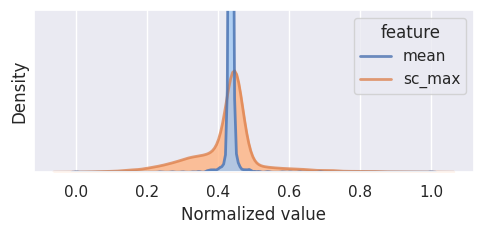

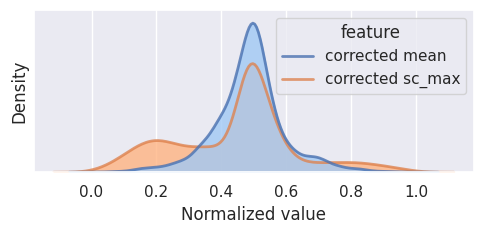

In [212]:
# sns.lineplot(data=quantile_df[quantile_df.c==False], x="value", y="quantile", hue="feature", palette=sns.color_palette("pastel"))
# sns.lineplot(data=quantile_df[quantile_df.c==True], x="value", y="quantile", hue="feature", palette=sns.color_palette("deep"))
# plt.xlabel("MinMax normalized value")
# plt.xlim(0.3,0.7)
# plt.xlabel("mean field")
# plt.savefig("highkurt_quantiles.pdf")

fig, ax = plt.subplots(figsize=(5,2.5))
sns.kdeplot(data=quantile_df[quantile_df.c==False], x="value", hue="feature",alpha=.8,fill=True, palette=sns.color_palette("pastel"), legend=True)
sns.kdeplot(data=quantile_df[quantile_df.c==False], x="value", hue="feature", alpha=.8,fill=False, color="k", lw=2, legend=True)

plt.xlabel("Normalized value")
plt.ylim(0,8)
plt.yticks([])
plt.tight_layout()
plt.savefig("highkurt_distribution.pdf")

fig, ax = plt.subplots(figsize=(5,2.5))
sns.kdeplot(data=quantile_df[quantile_df.c==True], x="value", hue="feature",alpha=.8,fill=True, palette=sns.color_palette("pastel"), legend=True)
sns.kdeplot(data=quantile_df[quantile_df.c==True], x="value", hue="feature", alpha=.8,fill=False, color="k", lw=2, legend=True)

plt.xlabel("Normalized value")
plt.ylim(0,3)
plt.yticks([])
plt.tight_layout()
plt.savefig("highkurt_distribution2.pdf")

In [36]:
print(np.sum(np.diff(np.sort(scmax)) == 0.0))
from scipy.stats import kurtosis
for feat in quantitative_features:
    print(f"{feat} {kurtosis(df[feat])}")

29
intensity -0.17804500645803856
kur 7.7416342452010785
length_ms -0.21491120714415368
max 5.0633669024470525
mean 397.5184434268851
mfcc_max -0.49702690539843664
mfcc_mean -0.22248600092482285
mfcc_min -0.13431929490091532
mfcc_std -0.41825592992483207
min 5.622136951333259
sc_kur 11.868311213851694
sc_max 4.606613216222096
sc_mean -0.2905972740391918
sc_min -1.4095347737534554
sc_skew 0.33870485486812063
sc_std 0.11433760605857346
skew 0.8857763304710544
std 6.355540693001052
stft_kur 10.288186363749338
stft_max nan
stft_mean -0.42614753955242035
stft_min 13.934733956530941
stft_skew -0.0644140975722669
stft_std 0.4166327189341823
zcs 0.8724097675514852


/tmp/ipykernel_4319/3809899476.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(f"{feat} {kurtosis(df[feat])}")


In [143]:
m, scmax = df["mean"], df["sc_max"]
center_m, center_sc = np.quantile(m, 0.5), np.quantile(scmax, 0.5)
band_m, band_sc = np.quantile(m, up) - np.quantile(m, low), np.quantile(scmax, up) - np.quantile(scmax, low)

m_prime  = np.sign(df["mean"]-center_m)*np.log(2*np.abs(df["mean"]-center_m)/band_m + 1)
sc_prime = np.sign(df["sc_max"]-center_sc)*np.log( np.abs(df["sc_max"] - center_sc)/band_sc + 1 )

m_prime, sc_prime = MinMaxScaler().fit_transform(np.array([m_prime, sc_prime]).T).T

df["mean"] = m_prime
df["sc_max"] = sc_prime

In [144]:
# Check for infinite values
np.logical_not(np.isfinite(df[quantitative_features].values)).sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

#### Replacing values

Since zeros are spurious, maybe a possible strategy is to replace `_min` with `_mean` or a function of it

As it can be seen, `sc_mean` can replace `sc_min` if scaled by a factor $\approx 4$, while `stft_mean` seems to have a more complex relaton with `stft_min`.

First we try to divide `sc_min` by the approximate factor and scaling a log-transform `stft_mean`:

Now two things are clear:
- `stft_min` (from now $\mathcal{F}_{ min}$) can be replaced by the log-transformed scaled `stft_mean` ($\langle \mathcal{F}\rangle $) value
- `sc_min` ($S_{min}$) can be replaced with a scaled version of `sc_mean` ($\langle S \rangle$)

So we proceed to estimate the proportionality coefficients:

$$\mathcal{F}_{min} \leftarrow \alpha \langle \mathcal{F} \rangle + \beta $$
$$S \leftarrow \gamma \langle S \rangle + \delta$$


This is a regression on a single feature for patological values. More realistically one can perform a LR on the same class of parameters (`sc_`, `stft_`) or see if correct values are somewhat higli correlated to some other feature.

sc_skew   -0.163778
zcs        0.287142
Name: sc_min, dtype: float64
mfcc_std     0.475550
stft_skew   -0.482892
Name: stft_min, dtype: float64


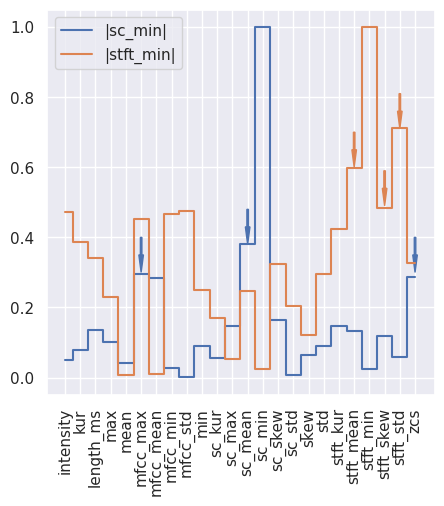

In [145]:
# Exclude patologic samples
df_correlations = df.drop(columns=["stft_max"])
try:
    quantitative_features.remove("stft_max")
except Exception as e:
    print(e)
filter = (df.sc_min != 0.0)&(df.stft_min!= 0.0) 
correct_samples = np.where(filter)
wrong_samples = np.where(np.logical_not(filter))

plt.figure(figsize=(5,5))
# Correlation on the correct samples
correct_corr = df[quantitative_features].iloc[correct_samples].corr(method="pearson")
print(correct_corr["sc_min"][["sc_skew", "zcs"]])
print(correct_corr["stft_min"][["mfcc_std", "stft_skew"]])

plt.step(range(len(quantitative_features)), correct_corr["sc_min"].abs(), where="mid", label="|sc_min|")
plt.step(range(len(quantitative_features)), correct_corr["stft_min"].abs(), where="mid", label="|stft_min|")
plt.legend()
plt.xticks(range(len(quantitative_features)), labels=quantitative_features, rotation=90)
# plt.title("Correlation of correct samples of patological features with other")
plt.arrow(5, 0.4, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[0])
plt.arrow(12, 0.48, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[0])
plt.arrow(23, 0.4, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[0])

plt.arrow(19, 0.7, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[1])
plt.arrow(21, 0.59, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[1])
plt.arrow(22, 0.81, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[1])

plt.savefig("images/correlation_pathological.pdf")


Corrections

In [146]:
from sklearn.linear_model import LinearRegression

# Selects the patological samples
patological = (df.sc_min == 0.0) & (df.stft_min==0.0)
correct = np.logical_not(patological)

print(f"There are {np.sum(patological)} patological samples")

# Multivariate linear regression is executed over ALL the good parameters
# and predicts both the patological features
X=df[["stft_mean", "stft_skew", "stft_std","mfcc_max", "sc_mean", "zcs"]].values
Y=df[["sc_min", "stft_min"]].values

# Transforms the correct values of stft_min in logarithmic scale
# Because the model works better in log scale (exponentially distributed data are not
# well fitted with a linear model)

Y[correct,1] = np.log(Y[correct,1])

model=LinearRegression()


model.fit(X[correct],Y[correct])
# Now estimates the patological samples 
Y_estimated=model.predict(X[patological])

corrected_dataset = df.copy()
corrected_dataset.sc_min.loc[patological] = Y_estimated[:,0]
corrected_dataset.stft_min.loc[patological] = Y_estimated[:,1]
corrected_dataset.stft_min.loc[correct] =  np.log(corrected_dataset.stft_min.loc[correct])

There are 1021 patological samples


/tmp/ipykernel_4319/1576215327.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_dataset.sc_min.loc[patological] = Y_estimated[:,0]
/tmp/ipykernel_4319/1576215327.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_dataset.stft_min.loc[patological] = Y_estimated[:,1]
/tmp/ipykernel_4319/1576215327.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_dataset.stft_min.loc[correct] =  np.log(corrected_dat

Renormalization

In [147]:
# for family in [mfcc_family, sc_family, stft_family]:
#     for feature in family:
#         corrected_dataset[feature] = MinMaxScaler().fit_transform(corrected_dataset[feature].to_numpy().reshape(-1,1))

Check for the distributions

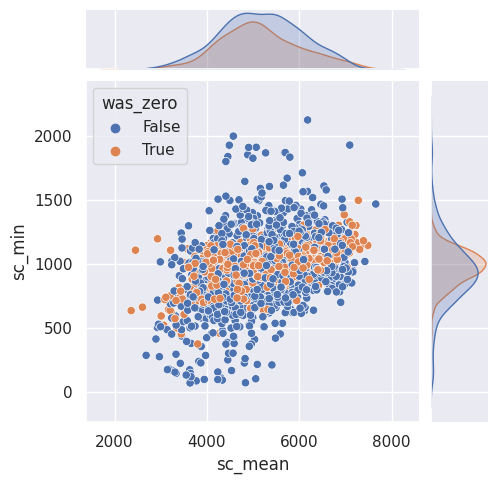

In [148]:
from sklearn.preprocessing import MinMaxScaler

was_zero = (df.sc_min == 0)
tmp_df = pd.DataFrame(dict(sc_mean=corrected_dataset.sc_mean, sc_min=corrected_dataset.sc_min , was_zero=was_zero))

sns.jointplot(data=tmp_df, x="sc_mean", y="sc_min", hue="was_zero", height=5)
plt.savefig("images/patological_sc_corrected.pdf")

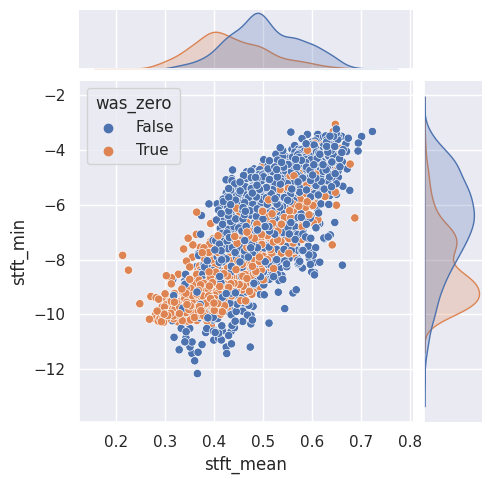

In [149]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
was_zero = (df.stft_min == 0)
tmp_df = pd.DataFrame(dict(stft_mean=corrected_dataset.stft_mean, stft_min=corrected_dataset.stft_min, was_zero=was_zero))

sns.jointplot(data=tmp_df, x="stft_mean", y="stft_min", hue="was_zero", height=5)
plt.savefig("images/patological_stft_corrected.pdf")

In [150]:
corrected_dataset["log_amp_pp"] = corrected_dataset["max"] - corrected_dataset["min"]
corrected_dataset.drop(columns= ["min", "max"])
try:
    quantitative_features.remove("min")
    quantitative_features.remove("max")
    quantitative_features.append("log_amp_pp")
except ValueError as e:
    print(e)

Now we copy the corrected dataset back into df

In [214]:
df = corrected_dataset.copy()

#### Vocal channel classificator

K-fold check to see classification power

missing vocal_channel : 196


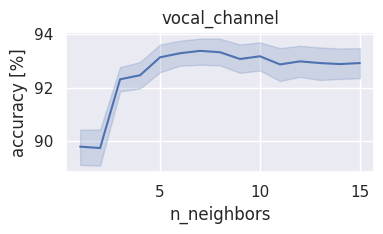

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

missing = df[quantitative_features].loc[df.vocal_channel.isna()]
classified = df[quantitative_features].loc[np.logical_not(df.vocal_channel.isna())]
labels = pd.Categorical(df.vocal_channel.loc[np.logical_not(df.vocal_channel.isna())])
label_map = dict(np.array([np.unique(labels.codes), np.unique(labels)]).T)

print(f"missing vocal_channel : {len(missing)}")
fig, ax = plt.subplots(figsize=(4,2.5))
N_samples = 50

n_neighbs = np.array(np.arange(15)+1)

accuracy_df = pd.DataFrame(columns=["n_neighbors", "accuracy", "feature"])

for k in range(N_samples):
    for i, n in enumerate(n_neighbs):
        neigh = KNeighborsClassifier(n_neighbors=n, weights="distance")
        X_train, X_test, y_train, y_test = train_test_split(classified, labels.codes, random_state=k+i, test_size= 0.07)
        neigh.fit(X_train, y_train)
        predicted = neigh.predict(X_test)

        record = dict(n_neighbors=n, accuracy=accuracy_score(y_test, predicted)*100, feature="vocal_channel")
        record = pd.DataFrame(record, index=[0])
        accuracy_df = pd.concat([accuracy_df, record])

sns.lineplot(accuracy_df[accuracy_df.feature=="vocal_channel"], x="n_neighbors", y="accuracy", ax=ax)
# plt.xlabel("n_neighbors")
plt.ylabel("accuracy [%]")
plt.title("vocal_channel")
plt.tight_layout()
# plt.yticks([85, 87, 89, 91, 93, 95, 97])
plt.savefig("images/classificator_precision_vocal_channel.pdf")

Now put the predicted value in the dataset

In [216]:
neigh = KNeighborsClassifier(n_neighbors=7, weights="distance")
neigh.fit(classified, labels.codes)
predicted = neigh.predict(missing)
pred_labels = np.vectorize(label_map.get)(predicted)
filled_df = df.copy()
filled_df.vocal_channel.loc[df.vocal_channel.isna()] = pred_labels
df = filled_df.copy()
print(df.vocal_channel.isna().sum())

0


/tmp/ipykernel_4319/1012271239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_df.vocal_channel.loc[df.vocal_channel.isna()] = pred_labels


#### Actor classificator

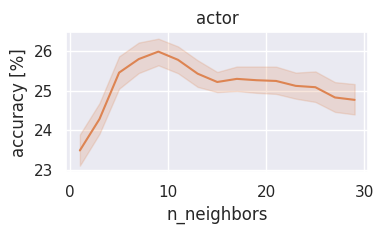

In [217]:
missing = df[quantitative_features].loc[df.actor.isna()]
classified = df[quantitative_features].loc[np.logical_not(df.actor.isna())]
labels = pd.Categorical(df.actor.loc[np.logical_not(df.actor.isna())])
label_map = dict(np.array([np.unique(labels.codes), np.unique(labels)]).T)

fig, ax = plt.subplots(figsize=(4,2.5))
N_samples = 50

n_neighbs = np.array(2*np.arange(15)+1)
accuracy_df = pd.DataFrame(columns=["n_neighbors", "accuracy", "feature"])

for k in range(N_samples):
    for i, n in enumerate(n_neighbs):
        neigh = KNeighborsClassifier(n_neighbors=n, weights="distance")
        X_train, X_test, y_train, y_test = train_test_split(classified, labels.codes, random_state=k+i, test_size= 0.4)
        neigh.fit(X_train, y_train)
        predicted = neigh.predict(X_test)
        
        record = dict(n_neighbors=n, accuracy=accuracy_score(y_test, predicted)*100, feature="actor")
        record = pd.DataFrame(record, index=[0])
        accuracy_df = pd.concat([accuracy_df, record])

sns.lineplot(accuracy_df[accuracy_df.feature=="actor"], x="n_neighbors", y="accuracy", color=sns.color_palette()[1], ax=ax)
plt.xlabel("n_neighbors")
plt.title("actor")
plt.ylabel("accuracy [%]")
# plt.yticks([85, 87, 89, 91, 93, 95, 97])
plt.tight_layout()
plt.savefig("images/classificator_precision_actor.pdf")

### Correlations

Categorical features cannot be correlated using Spearman correlation, so it is necessary to split `cat/quant`.

- Spearman correlation for numeric data
- [Cramer's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) for categorical data

A _label encoding_ is necessary to perform Cramer's V.

Finally, a cross corrrelation has to be chosen (TODO)

#### Categorical

In [155]:
# Categorical encoding
df_encoded = pd.DataFrame()
for feature in categorical_features:
    # Note: NaN values are converted to -1
    df_encoded[feature] = pd.Categorical(df[feature]).codes

df_encoded.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_width,channels
0,1,3,0,0,1,1,0,0,0
1,1,0,0,0,0,15,0,0,0
2,0,4,1,0,1,15,0,0,0
3,1,7,0,1,0,13,0,0,0
4,0,4,1,0,1,1,0,0,0


The only features that appear to be "V-correlated" are the sex and actor feature, that is intuitively correct.
The not complete correation is probably due to the missing values in the actor feature.

#### Numeric

<AxesSubplot: >

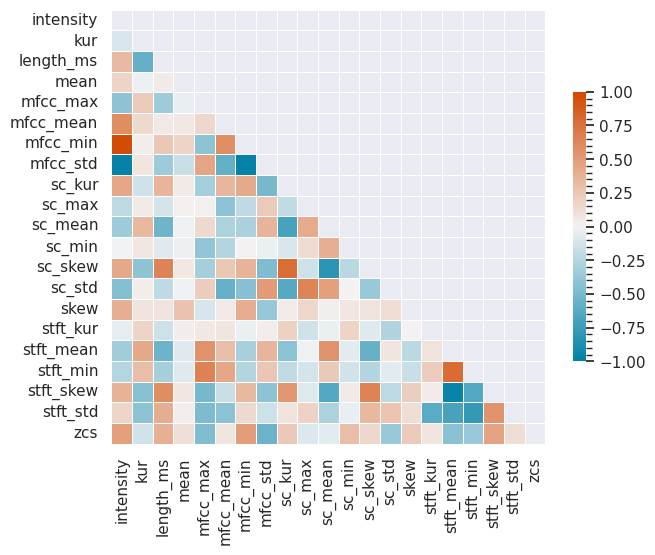

In [156]:
corr = df[quantitative_features].copy().drop(columns=["std", "log_amp_pp"])
corr = corr.corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, s=100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/tmp/ipykernel_4319/1553576081.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  supp_df.corr(method="pearson")["stft_mean"]["stft_skew"]


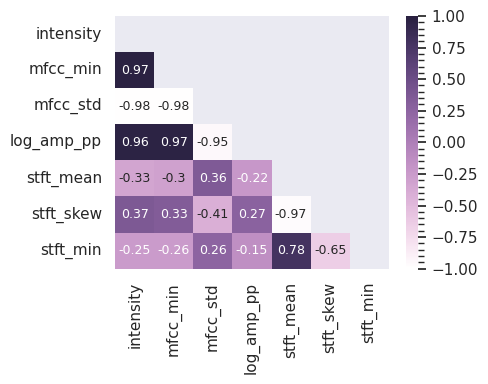

In [157]:
supp_df = df.copy()

# sns.pairplot(supp_df[["stft_mean", "stft_skew"]])
supp_df.corr(method="pearson")["stft_mean"]["stft_skew"]

supp_df = df[["intensity", "mfcc_min", "mfcc_std", "log_amp_pp", "stft_mean", "stft_skew", "stft_min"]]
cmap=sns.cubehelix_palette(rot=.2, light=1, as_cmap=True)

mask = np.triu(np.ones_like(supp_df.corr(method="spearman"), dtype=bool))
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(supp_df.corr(method="spearman"),  vmin=-1, vmax=1, cmap=cmap, annot=True, annot_kws=dict(size=9), mask=mask, ax=ax)
plt.tight_layout()
plt.savefig("images/higly_correlated_numeric.pdf")

Mixed correlations

In [158]:
all_cat = pd.DataFrame()
Nclasses = 30
for family in [mfcc_family, stft_family, sc_family, trivial_quant_features]:
    for feat in family:
        if feat != "stft_max":
            bins = np.quantile(df[feat], np.linspace(0,1,Nclasses))
            all_cat[feat] = pd.cut(x=df[feat], bins=bins, labels=range(Nclasses-1), include_lowest=True)
all_cat = all_cat.join(df_encoded)
try:
    all_cat.drop(columns=["frame_width", "channels"], inplace=True)
except KeyError as e:
    print(e)

In [159]:
nontrivial = mfcc_family + stft_family + sc_family
nontrivial.remove("stft_max")
categorical_features.remove("frame_width")
categorical_features.remove("channels")

In [160]:
from sklearn.metrics import adjusted_mutual_info_score as ami
V = np.zeros((len(categorical_features), len(nontrivial) + len(trivial_quant_features)))
ami_df = pd.DataFrame(columns=["numeric", "category", "ami"])

for i,row in enumerate(categorical_features):
  for j,col in enumerate(nontrivial + trivial_quant_features):

    # Filter NaNs
    filter = np.logical_not((all_cat[row].isna())|(all_cat[col].isna()))
    ush = all_cat.loc[filter]
    V[i,j] = ami(ush[row],ush[col])# cramers_V(all_cat[row], all_cat[col])
    
    record = pd.DataFrame(dict(numeric=col, category=row, ami=V[i,j]), index=[0])
    ami_df = pd.concat([ami_df, record], ignore_index=True)

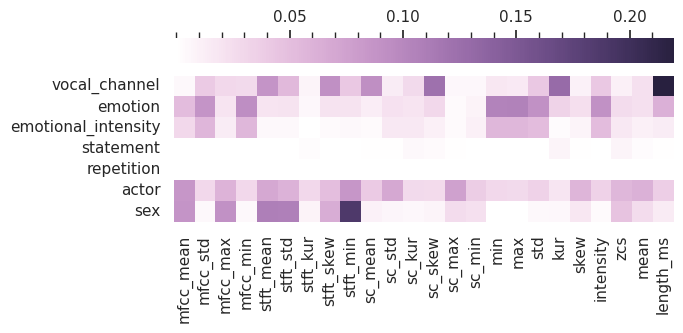

In [161]:
fig, ax = plt.subplots(figsize= (7,3.5))
ax.set_aspect("equal")
cmap=sns.cubehelix_palette(rot=.2, light=1, as_cmap=True)
sns.heatmap(V, ax=ax, cmap=cmap,
            # mask=np.identity(len(all_cat.columns)),
            cbar_kws={"shrink": 1.0, "ticks":[0.05, 0.1, 0.15, 0.2, .25, .3], "location":"top"}
            )
# ax.axvline(len(all_cat.columns) - 7, color='k')
# ax.axhline(len(all_cat.columns) - 7, color= 'k')

plt.xticks(np.arange(len(nontrivial) + len(trivial_quant_features))+0.5,labels=nontrivial+trivial_quant_features, rotation=90,);
plt.yticks(np.arange(len(categorical_features))+0.5,labels=categorical_features, rotation=0,);
plt.tight_layout()
plt.savefig("images/categorical_vs_nontivial_cramer.pdf")

### Violin plots

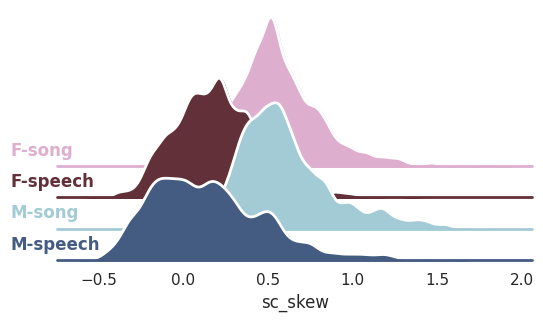

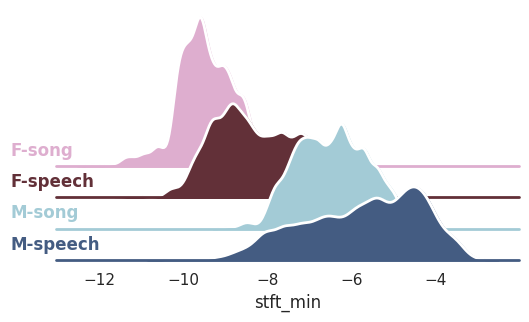

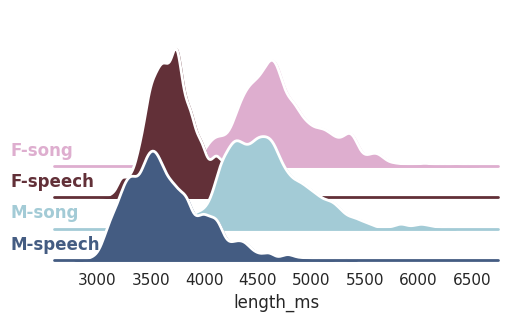

In [182]:
cool_features = ["sc_skew", "stft_min", "length_ms"]

classes = [f"{s}-{v}" for s,v in df[["sex", "vocal_channel"]].values]

def cross_cat(a,b):
    return [f"{c1}-{c2}" for c1, c2 in zip(a,b)]

for feat in cool_features:
    violin_df = df.copy()
    violin_df['cat'] = cross_cat(df.sex, df.vocal_channel)
    violin_df['normalized_value'] = df[feat]
    violin_df = violin_df.sort_values(by='cat', key=lambda col: col.str.lower())

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # pal = np.concatenate((sns.cubehelix_palette(2,start=1, rot=0, dark=.25, light=.75), sns.cubehelix_palette(2,start=0, rot=0, dark=.25, light=.75)))
    pal = np.concatenate( (sns.cubehelix_palette(2, start=1, dark=.25, light=.75, rot=-.2), sns.cubehelix_palette(2,start=0, dark=.35, light=.75, rot=-.2)) )
    g = sns.FacetGrid(violin_df, row="cat", hue="cat", aspect=7, height=0.8, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot,  "normalized_value",
        clip_on=False,
        fill=True, alpha=1, linewidth=1.5, bw_adjust=0.5)
    g.map(sns.kdeplot, "normalized_value", clip_on=False, color="w", lw=2, bw_adjust=0.5)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(-0.1, .1, label, fontweight="bold", color=color,
                    ha="left", va="center", transform=ax.transAxes)

    g.map(label,  "cat")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-0.8, top=1.0)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.set(xlabel=feat)
    # g.set(xticks=np.linspace(0,1, 5))
    g.despine(left=True, bottom=True)
    plt.savefig(f"images/{feat}_conditional_distrib.pdf")


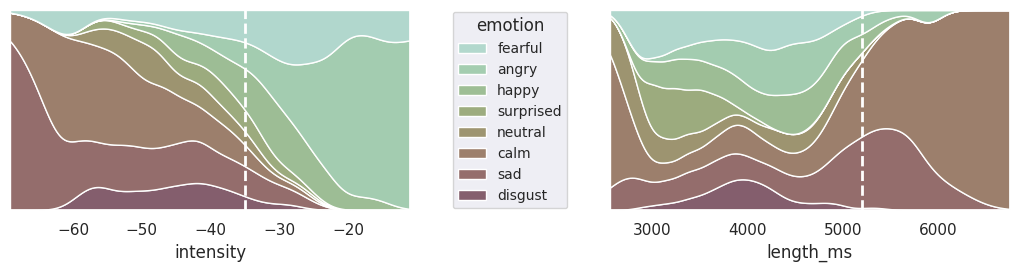

In [185]:
fig, ax = plt.subplots(1,2, figsize=(10, 2.5))

pal = sns.cubehelix_palette(8,light=.75, dark=.25, rot=1)
sns.set_style("dark")
obj=sns.kdeplot(data=df, x="intensity", hue="emotion", multiple="fill", bw_adjust=1, palette=pal, legend=False, ax=ax[0])
ax[0].set_ylabel("")
ax[0].set_yticks([])
ax[0].axvline(-35, ls="--", color="w", lw=2)

# ax[0].set_xlim(0,1)
# ax[0].set_ylim(0,1)

obj=sns.kdeplot(data=df, x="length_ms", hue="emotion", multiple="fill", bw_adjust=1, palette=pal, legend=True, ax=ax[1])
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[1].axvline(5200, ls="--", color="w", lw=2)

sns.move_legend(obj,loc="center", bbox_to_anchor=(-0.25, 0.5), ncols=1, fontsize=10)
plt.subplots_adjust(wspace=0.5, bottom=0.2, left=0., right=1, top=1)
plt.savefig("images/emotion_conditional.pdf")


### Saving the clean dataset

Better to fill remaining Nan values to `not available` (`N/A`)

In [164]:
clean_categorical = df[categorical_features].fillna(value="GNAA")
clean_quantitative = df[quantitative_features].drop(columns=[ "std", "mfcc_min", "intensity", "log_amp_pp", "stft_mean"])

display(clean_categorical)
display(clean_quantitative)

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F
2,song,happy,strong,Dogs are sitting by the door,2nd,16.0,F
3,speech,surprised,normal,Kids are talking by the door,1st,14.0,F
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F
...,...,...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st,23.0,M
2448,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M
2449,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M
2450,speech,surprised,normal,Kids are talking by the door,1st,GNAA,M


,kur,length_ms,mean,mfcc_max,mfcc_mean,mfcc_std,sc_kur,sc_max,sc_mean,sc_min,sc_skew,sc_std,skew,stft_kur,stft_min,stft_skew,stft_std,zcs
0,9.406061,3737,0.516733,171.69092,-33.485947,134.654860,-1.120769,0.766460,5792.550744,1250.763583,0.250940,3328.055457,0.273153,-1.215025,-8.184647,0.403514,0.335533,16995
1,19.564187,3904,0.492286,205.00770,-29.502108,130.485630,-1.531204,0.476926,5197.620555,950.006542,0.219582,4040.931570,0.292157,-1.384174,-8.549520,0.290905,0.352380,13906
2,4.881241,4671,0.576708,165.45653,-30.532463,126.577110,-1.130153,0.479789,4830.743037,1056.726022,0.436699,3332.131300,0.302659,-1.242947,-9.521666,0.470350,0.352270,18723
3,13.040259,3637,0.509706,190.03609,-36.059555,159.725160,-1.497765,0.494705,5376.446478,995.995071,0.098802,4053.663073,-0.081014,-1.445318,-9.282557,0.274756,0.360552,11617
4,7.485109,4404,0.535177,161.13400,-31.405996,122.125824,-1.167544,0.486484,5146.012474,1085.672654,0.496066,3442.724109,0.414872,-1.366742,-9.043047,0.318926,0.350655,15137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,9.551363,4605,0.538332,208.18497,-30.225578,158.845500,-1.588861,0.546123,5886.647366,971.199164,0.184390,4114.260257,0.759247,-1.075888,-6.054055,-0.310088,0.304496,9871
2448,22.517991,4171,0.520155,220.79490,-31.160332,157.499700,-1.614582,0.500453,6602.742127,1023.879633,-0.113920,4191.727090,1.073633,-1.026071,-5.892927,-0.408018,0.306333,8963
2449,4.964319,5239,0.336742,235.53938,-26.135280,138.133210,-1.337419,0.545177,4654.156076,733.557843,0.619346,4231.511986,-0.005821,-1.473789,-6.998124,0.130310,0.347843,9765
2450,13.855588,3737,0.375557,219.84350,-28.242815,159.943400,-1.465594,0.469941,5524.736973,760.822547,0.206481,3596.031841,-0.110966,-1.277117,-6.459900,-0.242668,0.308684,9716


Now drop the removed features

In [165]:
try:
    clean_categorical.drop(columns=["frame_width", "channels"], inplace=True)
    clean_quantitative.drop(columns=["stft_max"], inplace=True)
except KeyError as e:
    print(e)

"['frame_width', 'channels'] not found in axis"


In [166]:
# Local
clean_quantitative.to_csv("ravdess_quantitative.csv", index=False)
clean_categorical.to_csv("ravdess_categorical.csv", index=False)

# Next part's folder
clean_quantitative.to_csv("../CLUSTERING/ravdess_quantitative.csv", index=False)
clean_categorical.to_csv("../CLUSTERING/ravdess_categorical.csv", index=False)

<AxesSubplot: xlabel='mean', ylabel='Count'>

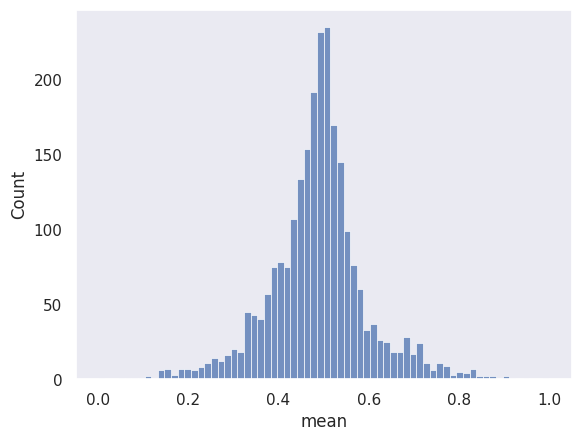

In [167]:
sns.histplot(df["mean"])

## Clean Sankey diagram

In [168]:
all_cat = pd.DataFrame()
Nclasses = 30

for feat in clean_quantitative.columns:
    bins = np.quantile(clean_quantitative[feat], np.linspace(0,1,Nclasses))
    all_cat[feat] = pd.cut(x=df[feat], bins=bins, labels=[f"{feat}{_}" for _ in range(Nclasses-1)] , include_lowest=True)
clean_categorical = clean_categorical.drop(columns=["actor"])
encoded_categ = clean_categorical.copy()
for feat in encoded_categ:
    if feat != "actor":
        encoded_categ[feat] = pd.Categorical(encoded_categ[feat]).codes
        encoded_categ[feat] = encoded_categ[feat].apply(lambda x: f"{feat}{x}")

all_cat = all_cat.join(encoded_categ)
display(all_cat)

,kur,length_ms,mean,mfcc_max,mfcc_mean,mfcc_std,sc_kur,sc_max,sc_mean,sc_min,sc_skew,sc_std,skew,stft_kur,stft_min,stft_skew,stft_std,zcs,vocal_channel,emotion,emotional_intensity,statement,repetition,sex
0,kur13,length_ms9,mean19,mfcc_max4,mfcc_mean4,mfcc_std13,sc_kur19,sc_max27,sc_mean21,sc_min27,sc_skew11,sc_std12,skew22,stft_kur18,stft_min10,stft_skew23,stft_std15,zcs25,vocal_channel1,emotion3,emotional_intensity0,statement0,repetition1,sex0
1,kur26,length_ms13,mean14,mfcc_max16,mfcc_mean12,mfcc_std10,sc_kur5,sc_max14,sc_mean15,sc_min13,sc_skew10,sc_std25,skew22,stft_kur7,stft_min8,stft_skew20,stft_std23,zcs19,vocal_channel1,emotion0,emotional_intensity0,statement0,repetition0,sex0
2,kur3,length_ms23,mean24,mfcc_max3,mfcc_mean9,mfcc_std9,sc_kur19,sc_max15,sc_mean10,sc_min20,sc_skew17,sc_std12,skew22,stft_kur17,stft_min3,stft_skew25,stft_std23,zcs27,vocal_channel0,emotion4,emotional_intensity1,statement0,repetition1,sex0
3,kur20,length_ms7,mean18,mfcc_max10,mfcc_mean1,mfcc_std24,sc_kur7,sc_max19,sc_mean17,sc_min16,sc_skew7,sc_std25,skew12,stft_kur3,stft_min4,stft_skew19,stft_std26,zcs11,vocal_channel1,emotion7,emotional_intensity0,statement1,repetition0,sex0
4,kur9,length_ms19,mean21,mfcc_max2,mfcc_mean8,mfcc_std7,sc_kur18,sc_max18,sc_mean14,sc_min22,sc_skew19,sc_std14,skew25,stft_kur8,stft_min6,stft_skew21,stft_std22,zcs22,vocal_channel0,emotion4,emotional_intensity1,statement0,repetition1,sex0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,kur13,length_ms22,mean22,mfcc_max17,mfcc_mean10,mfcc_std24,sc_kur3,sc_max24,sc_mean22,sc_min14,sc_skew9,sc_std26,skew28,stft_kur24,stft_min21,stft_skew3,stft_std4,zcs5,vocal_channel1,emotion1,emotional_intensity1,statement1,repetition0,sex1
2448,kur27,length_ms16,mean19,mfcc_max22,mfcc_mean8,mfcc_std24,sc_kur2,sc_max20,sc_mean27,sc_min18,sc_skew2,sc_std27,skew28,stft_kur25,stft_min22,stft_skew2,stft_std4,zcs3,vocal_channel1,emotion1,emotional_intensity0,statement0,repetition0,sex1
2449,kur3,length_ms27,mean2,mfcc_max26,mfcc_mean20,mfcc_std15,sc_kur13,sc_max24,sc_mean8,sc_min3,sc_skew23,sc_std27,skew14,stft_kur2,stft_min16,stft_skew14,stft_std21,zcs5,vocal_channel0,emotion6,emotional_intensity1,statement0,repetition1,sex1
2450,kur21,length_ms9,mean3,mfcc_max22,mfcc_mean15,mfcc_std25,sc_kur8,sc_max11,sc_mean19,sc_min4,sc_skew10,sc_std18,skew11,stft_kur15,stft_min19,stft_skew4,stft_std5,zcs5,vocal_channel1,emotion7,emotional_intensity0,statement1,repetition0,sex1


In [169]:
ami_df = pd.DataFrame(columns=["num", "cat", "ami"])
for numer in clean_quantitative:
    for categ in clean_categorical:
        filter_nan = np.logical_not(all_cat[categ].isna())
        ush = all_cat.loc[filter_nan]
        record = dict(num=numer, cat=categ, ami=ami(ush[numer] ,ush[categ]))
        ami_df = pd.concat([ami_df, pd.DataFrame(record, index=[0])], ignore_index=True)
display(ami_df[ami_df.cat == "actor"].sort_values(by="ami"))


,num,cat,ami


In [170]:
th_ami_df =ami_df.copy()
lower_thre = np.quantile(ami_df.ami, 0.85)
print(lower_thre)
# th_ami_df["ami"][ami_df.ami < lower_thre] = 0

useless = []
for row_index in range(len(th_ami_df)):
    if th_ami_df.iloc[row_index].ami < lower_thre:
        useless.append(row_index)
th_ami_df = th_ami_df.drop(labels=useless, axis=0)
th_ami_df.reset_index(inplace=True)
display(th_ami_df)

0.042109635377839634


,index,num,cat,ami
0,0,kur,vocal_channel,0.129592
1,6,length_ms,vocal_channel,0.219573
2,7,length_ms,emotion,0.062326
3,23,mfcc_max,sex,0.090940
4,25,mfcc_mean,emotion,0.053073
...,...,...,...,...
12,90,stft_skew,vocal_channel,0.091197
13,95,stft_skew,sex,0.065502
14,96,stft_std,vocal_channel,0.054642
15,101,stft_std,sex,0.108252


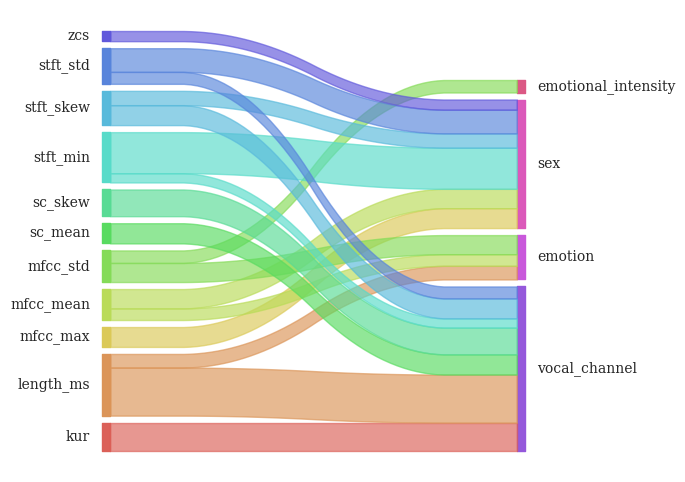

In [171]:
from pySankey.sankey import sankey


sankey(
    left=th_ami_df["num"], right=th_ami_df["cat"], rightWeight=th_ami_df["ami"], leftWeight=th_ami_df["ami"],
    aspect=20, fontsize=10
)
plt.savefig("images/sankey_ami.pdf")

## Chord cor correlation

In [172]:
from d3blocks import D3Blocks    

chord_df = pd.DataFrame(columns= ["source", "target", "weight", "opacity"])

mat = df[quantitative_features].corr()
for i, featin in enumerate(mat.columns):
    for j, featout in enumerate(mat.columns):
        if i<j:
            corr = np.abs(mat[featin][featout])
            if corr > 0.3:
                record = pd.DataFrame(dict(source=featin, target=featout, weight=corr, opacity=corr-0.5), index=[0])
                chord_df = pd.concat([chord_df, record], ignore_index=True)
display(chord_df)
# Initialize
d3 = D3Blocks(frame=False)
d3.chord(chord_df, cmap="Set2", filepath="images/chord.html", opacity="opacity")

,source,target,weight,opacity
0,intensity,mfcc_max,0.386205,-0.113795
1,intensity,mfcc_mean,0.613950,0.113950
2,intensity,mfcc_min,0.974052,0.474052
3,intensity,mfcc_std,0.978670,0.478670
4,intensity,sc_kur,0.385675,-0.114325
...,...,...,...,...
103,stft_min,stft_std,0.795903,0.295903
104,stft_min,zcs,0.352747,-0.147253
105,stft_skew,stft_std,0.574816,0.074816
106,stft_skew,zcs,0.445898,-0.054102


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> Node properties are set.
/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/d3blocks/utils.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if 'weight' in X.columns: X['weight'] = X['weight'].astype(float)
[d3blocks] >INFO> Set edge-opacity to default value (0.8).
[d3blocks] >INFO> Set edge-colors based on the [source] node-color.
[d3blocks] >INFO> Convert to Dictionary.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/home/djanloo/Desktop/dynamiting/UNDERSTAN